**LAB 1** 

Name: **Arpit Agarwal** 

Data: **03/03/2025**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import scipy.integrate as scint

**PART 1**

In [2]:
#Part(a)
def V(M,xm,ym,x,y): 
    G = 6.67*(10**(-11))
    if np.isclose(xm,x) and np.isclose(ym,y):
        return np.nan
    else:   
        v = -G*M/(np.sqrt((xm-x)**2 + (ym-y)**2))
        return v 

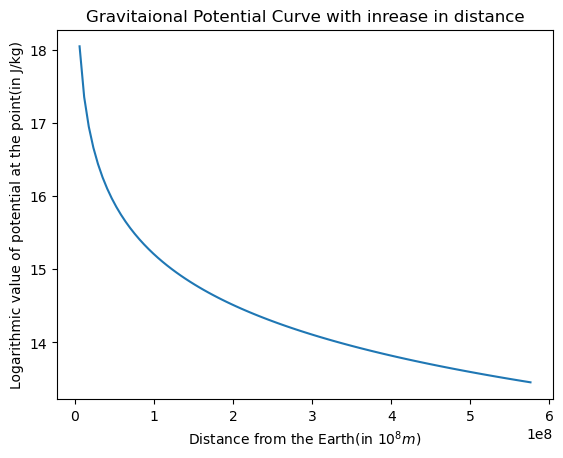

In [3]:
#Part(b)
Me = 6*(10**24) 
xm = 0 
ym = 0 
rEM = 3.84*(10**8) 
X = np.linspace(0,1.5*rEM,100) 
y = np.zeros_like(X) 
v = np.vectorize(V) 
Y = np.log(np.abs(v(Me,xm,ym,X,y)))
fig,ax = plt.subplots();
ax.plot(X,Y) 
ax.set_xlabel("Distance from the Earth(in $10^8m$)");
ax.set_ylabel("Logarithmic value of potential at the point(in J/kg)");
ax.set_title("Gravitaional Potential Curve with inrease in distance");

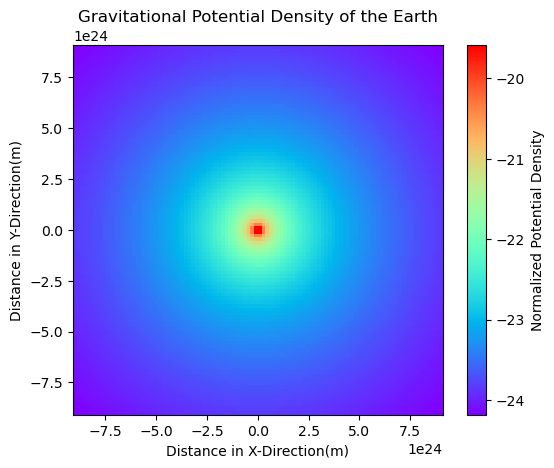

In [4]:
#Part(c)
x = np.linspace(-1.5*Me,+1.5*Me,100) 
y = np.linspace(-1.5*Me,+1.5*Me,100) 
X,Y = np.meshgrid(x,y) 
Z = np.abs(v(Me,xm,ym,X,Y)) 
fig,ax = plt.subplots();
cmesh = ax.pcolormesh(X,Y,((np.log(Z))),cmap=cm.rainbow);
ax.set_aspect("equal")
cbar = fig.colorbar(cmesh)
cbar.set_label("Normalized Potential Density");
ax.set_xlabel("Distance in X-Direction(m)");
ax.set_ylabel("Distance in Y-Direction(m)");
ax.set_title("Gravitational Potential Density of the Earth");

**Part 2**

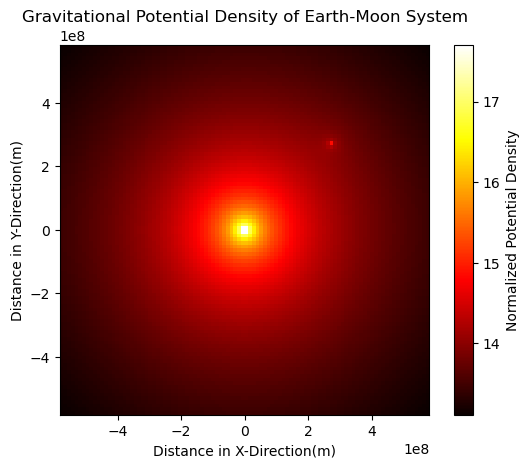

In [5]:
#Part(a) 
Mm = 7.3*(10**22) 
xe = 0
ye = 0 
xm = rEM/np.sqrt(2) 
ym = rEM/np.sqrt(2) 
x = np.linspace(-1.5*rEM,1.5*rEM,100)  
y = np.linspace(-1.5*rEM,1.5*rEM,100) 
X,Y = np.meshgrid(x,y) 
Ve = np.abs(v(Me,xe,ye,X,Y)) 
Vm = np.abs(v(Mm,xm,ym,X,Y)) 
V = Ve+Vm 
fig,ax = plt.subplots() 
cmesh = ax.pcolormesh(X,Y,np.log(V),cmap=cm.hot)
ax.set_aspect("equal")
cbar = fig.colorbar(cmesh)
cbar.set_label("Normalized Potential Density");
ax.set_xlabel("Distance in X-Direction(m)");
ax.set_ylabel("Distance in Y-Direction(m)");
ax.set_title("Gravitational Potential Density of Earth-Moon System");

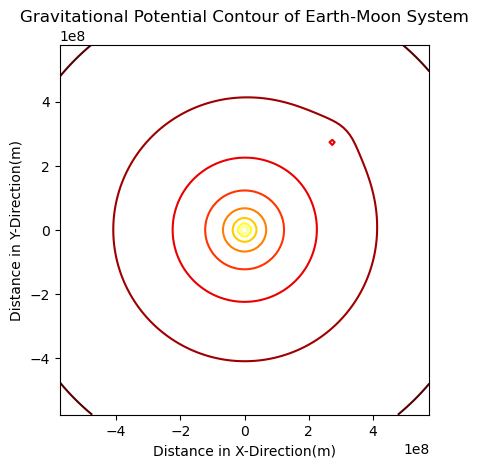

In [6]:
#Part(b) 
fig1,ax1 = plt.subplots() 
lvl = np.linspace(0,10**8,500)
ax1.contour(X,Y,np.log(V),cmap=cm.hot) 
ax1.set_aspect("equal")
ax1.set_xlabel("Distance in X-Direction(m)");
ax1.set_ylabel("Distance in Y-Direction(m)");
ax1.set_title("Gravitational Potential Contour of Earth-Moon System");

**Part 3**

In [7]:
#Part(a) 
G = 6.67*(10**-11)
def F(x1,y1,x2,y2,M,m):
    if np.isclose(x1,x2) and np.isclose(y1,y2):
        return np.nan,np.nan
    else:
        r = np.sqrt((x2-x1)**2+(y2-y1)**2)
        fx = (-1*G*M*m)/(r**2)
        fy = (-1*G*M*m)/(r**2)
        return (fx*(x2-x1))/r,(fy*(y2-y1))/r

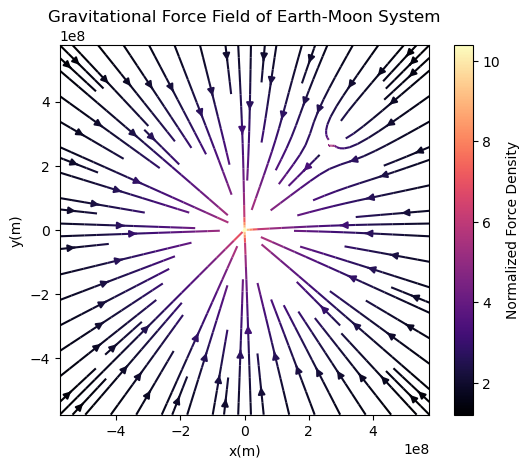

In [8]:
#Part(b) 
Ex = 0 
Ey = 0 
Mx = rEM/np.sqrt(2) 
My = rEM/np.sqrt(2) 
m = 5500 
x = np.linspace(-1.5*rEM,1.5*rEM,100) 
y = np.linspace(-1.5*rEM,1.5*rEM,100) 
fig,ax = plt.subplots() 
f = np.vectorize(F) 
X,Y = np.meshgrid(x,y)
Fxe,Fye = f(Ex,Ey,X,Y,Me,m) 
Fxm,Fym = f(Mx,My,X,Y,Mm,m) 
Fx,Fy = Fxe+Fxm,Fye+Fym
stream = ax.streamplot(X,Y,Fx,Fy,cmap=cm.magma,color=np.log(np.hypot(Fx,Fy))); 
cbar = fig.colorbar(stream.lines) 
cbar.set_label("Normalized Force Density");
ax.set_xlabel("x(m)"); 
ax.set_ylabel("y(m)"); 
ax.set_title("Gravitational Force Field of Earth-Moon System");
ax.set_aspect("equal")

**Part 4**

In [9]:
#Part(a) 
def t(mo,mf,mr):
    return (mo-mf)/mr

mo = 2.8*(10**6) 
mf = 7.5*(10**5) 
mr = 1.3*(10**4) 
T = t(mo,mf,mr) 
print("Burn out time of the rocket is:",T) 

Burn out time of the rocket is: 157.69230769230768


In [10]:
#Part(b) 
def v(t,ve,mo,mr,g,mf): 
    m = mo-(mr*t)
    if m <= mf:
        return np.nan 
    else: 
        dv = ve*np.log(mo/m) - g*t
        return dv 

In [11]:
#Part(c) 
ve = 2.4*(10**3)
g = 9.81
def V(t):
    return(v(ve,mo,mr,g,mf,t))
h,_ = scint.quad(v,0,T,args=(ve,mo,mr,g,mf))
print("Altitude for Burn Out of the rocket is:",h)

Altitude for Burn Out of the rocket is: 74093.98013366401
